<a href="https://colab.research.google.com/github/A-l-E-v/ML-Engineer/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание
# Тема 2. Урок 2. Matplotlib

## Инструкции для выполнения домашнего задания

1. Домашнее задание состоит из вводной части и 2 заданий
2. В вводной части вам нужно подключить необходимые библиотеки и импортировать функцию
3. В каждом задании дан фрагмент программного кода, который нужно дополнить для построения графиков
4. В каждом фрагменте программного кода даны комментарии, написанные через **#** и выделенные зеленым цветом. Комментарии или дают пояснения к строке, или объясняют, какие строки должны быть на месте пропусков, т.е. чем вы должны дополнить фрагмент программного кода до полноценной программы
5. В случае если вы забыли ранее изученные  материалы, вы всегда можете вернуться на обучающую платформу и просмотреть их заново (видео, презентация, тетрадь и т.д.), а также можете воспользоваться документацией Matplotlib

## Подготовка к выполнению домашего задания

### Импорт библиотек и функции

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

## 1. Солвер

Напишите функцию vis_solve, которая по переданным в неё функциям f1(x) и f2(x) будет рисовать их обе, а также итоговое решение в виде точки пересечения графиков. Решение будет аннотировано, причем в аннотации будет координата точки. <br>

Функция должна принимать и выдавать объект Axis, который будет изменяться в теле функции, так как нам, возможно, понадобится вернуть его для дальнейших манипуляций с ним, например, коррекции каких-то параметров осей (штрихов, подписей и др.) <br>

Также функция должна принимать сразу несколько параметров для итоговой кастомизации графика. <br> <br>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def vis_solve(ax, f1, f2, x_range, x_step=1e-3, title=None,
             colors=['r', 'b'], sol_color='g', linestyles=['-', '-'],
             labels=["first", "second"]):
    
    # Создаем сетку значений X
    X = np.arange(*x_range, step=x_step)
    y1 = list(map(f1, X))
    y2 = list(map(f2, X))
    
    # Находим решение уравнения f1(x) = f2(x)
    sol = fsolve(lambda x: f1(x) - f2(x), (x_range[1] - x_range[0])/2, xtol=x_step)
    sol_y = f1(sol[0])
    
    # Строим графики функций
    ax.plot(X, y1, color=colors[0], linestyle=linestyles[0], label=labels[0])
    ax.plot(X, y2, color=colors[1], linestyle=linestyles[1], label=labels[1])
    
    # Отмечаем точку пересечения
    ax.scatter(sol, sol_y, color=sol_color, s=100, label='Solution')
    
    # Добавляем заголовок
    if title:
        ax.set_title(title, fontsize=15)
    else:
        ax.set_title(f"Solution of the equation {labels[0]} = {labels[1]}", fontsize=15)
    
    # Добавляем аннотацию
    ax.annotate(f"solution ({sol[0]:.2f}; {sol_y:.2f})",
                xy=[sol[0], sol_y],
                xytext=(0, 30),
                textcoords="offset points",
                arrowprops={"arrowstyle": "simple"},
                fontsize=15)
    
    ax.tick_params(labelsize=15)
    ax.legend(fontsize=15)
    ax.grid(True)
    
    return ax

Используем созданную функцию (с этой функцией можно поиграть):

In [ ]:
# Пример использования
fig, ax = plt.subplots(figsize=(15, 10))
ax = vis_solve(ax, np.cos, lambda x: x**2, (0, 2), labels=[r"$\cos(x)$", r"$x^2$"])
plt.show()

: 

### Дополнительная информация

Для подписи некоторых графиков можно использовать $\LaTeX$-форматировние, которое хорошо работает с формулами. <br><br>
NB! Для чтения неотформатированных $\LaTeX$-примеров дважды щёлкните по ячейке <br><br>

На лекциях мы не обсуждали это, так что коротко поясню. $\LaTeX$-форматированные строчки в Python выглядят так: `r"blah blah $formula$"`, где r указывает на то, что строка будет читаться в *raw*-формате, что и нужно для использования $\LaTeX$. Текст вне знаков доллара будет выведен как обычно, а формулы должны быть обязательно заключены в эти знаки. Далее происходит их форматирование по правилам синтаксиса $\LaTeX$: например, "^" - это степень, {} - это скобки, которые означают, что мы хотим применить операцию на всё, что внутри них, так как по умолчанию операция применяется только на один символ после неё (сравните $e^x+2$ и $e^{x+2}$), любая функция или специальный символ начинается в $\LaTeX$ с "\\" (пример $\vdots$ или $\sin(x)$) <br><br>

Если есть желание разобраться подробнее, то начать можно [отсюда](https://habr.com/ru/companies/ruvds/articles/574352/) <br><br>

В matplotlib (и других библиотеках для визуализации) мы будем это использовать только для подписей графиков, осей, легенды или цветовых шкал.

In [ ]:
# используем итоговую функцию (с этой функцией можно играться)
fig, ax = plt.subplots(figsize=(15, 10))
ax = vis_solve(ax, np.cos, lambda x: x**2, (0, 2), labels=[r"$\cos(x)$", r"$x^2$"])
plt.show()

Если всё правильно сделано - выше появится график

## 2. Сводка о функциях

В этом задании мы будем пользоваться результатами предыдущего.

Есть две функции: $x^3$ и $e^{-x^2}$, составьте композицию графиков функций так, чтобы сверху отображались сами функции, а снизу - они обе и их пересечение.

Оформление:

*   Необходимый диапазон по оси Х: (-2; 2)
*   Все графики должны быть подписаны
*   На графиках должна быть легенда
*   Композиция должна быть на сиреневом фоне
*   Композиция должна быть подписана
*   После этого композицию надо будет сохранить в файл "hw1_solution.png"

**Если всё правильно, то должно получиться так:**

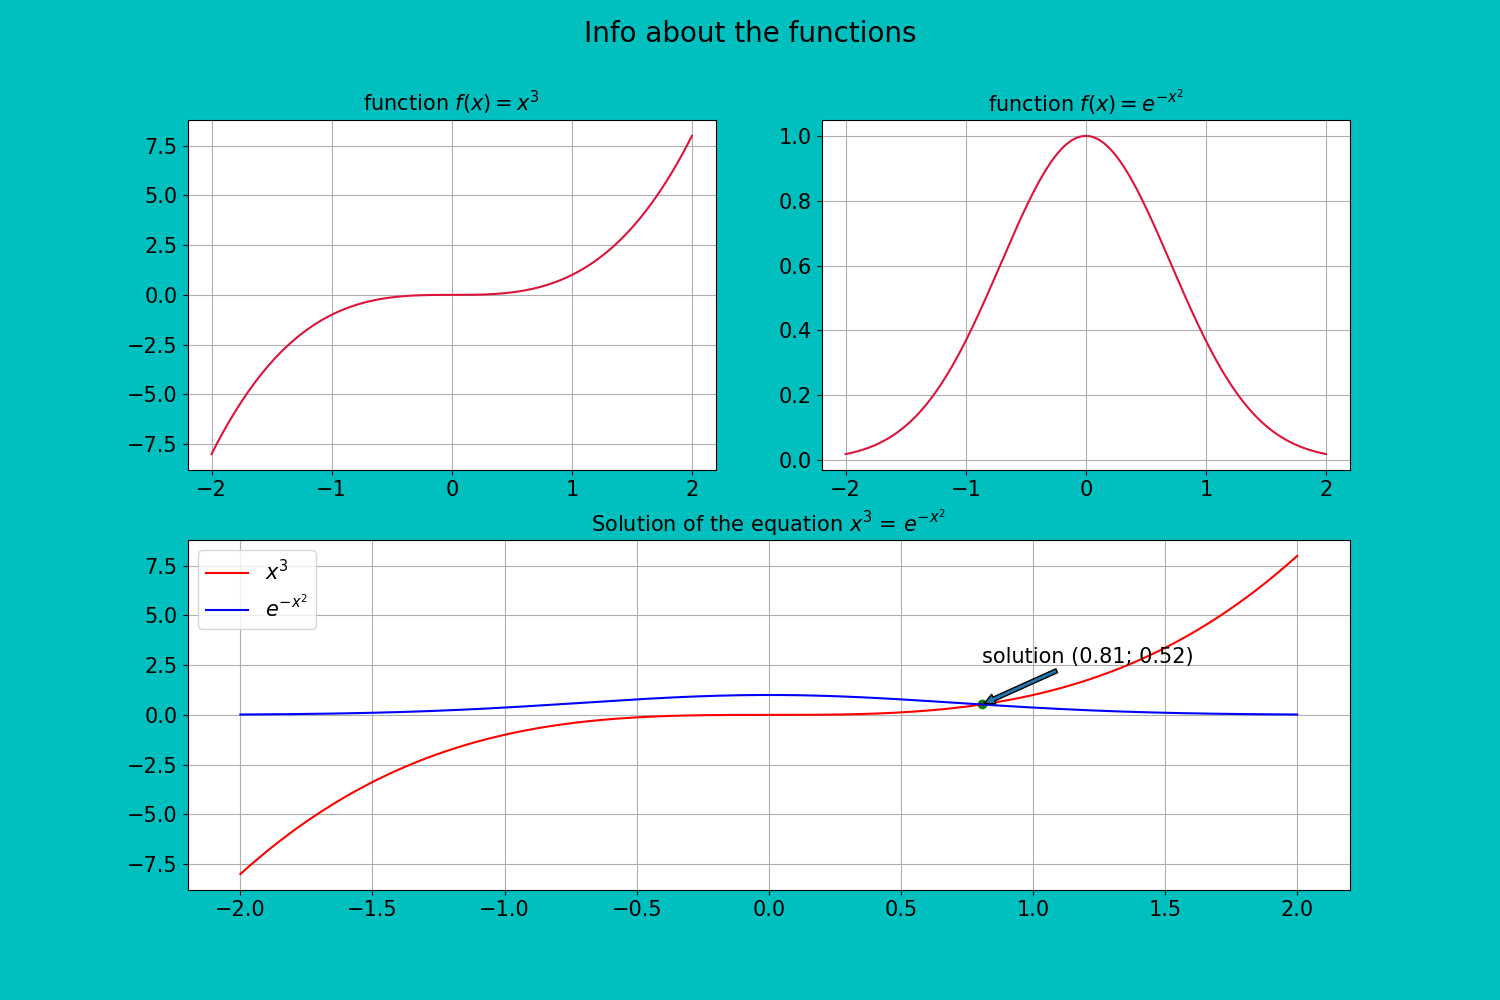

Задаём диапазон и функции:

In [ ]:
x_range = (-2, 2)
f1 = lambda x: x**3
f2 = lambda x: np.exp(-x**2)

Задаём сетку графиков 2х2:

In [ ]:
# Создаем сетку графиков
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Info about the functions", fontsize=20)
fig.set_facecolor('c')  # cyan фон

Задаём объект Axis ax_low, который "сшивает" две нижних пары осей:

In [ ]:
gs = fig.add_gridspec(2, 2)
ax_low = fig.advis_solve#(Напишите код с параметрами функции)d_subplot#(Напишите код)

Строим первый график:

In [ ]:
# Верхний левый график (x^3)
X = np.arange(*x_range, step=1e-3)
y1 = list(map(f1, X))
axs[0, 0].set_title(r"$f(x) = x^3$", fontsize=15)
axs[0, 0].tick_params(labelsize=15)
axs[0, 0].plot(X, y1, color='crimson', label=r"$x^3$")
axs[0, 0].grid(True)
axs[0, 0].legend(fontsize=12)

Строим второй график:

In [ ]:
# Верхний правый график (e^{-x^2})
y2 = list(map(f2, X))
axs[0, 1].set_title(r"$f(x) = e^{-x^2}$", fontsize=15)
axs[0, 1].tick_params(labelsize=15)
axs[0, 1].plot(X, y2, color='crimson', label=r"$e^{-x^2}$")
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize=12)

Отключаем оси у обоих "несшитых" графиков снизу:

In [ ]:
# Объединяем нижние графики
gs = axs[1, 0].get_gridspec()
for ax in axs[1, :]:
    ax.remove()
ax_low = fig.add_subplot(gs[1, :])

Пользуемся только что написанной функцией для нижнего большого объекта Axis с передачей нужных параметров:

In [ ]:

# Нижний объединенный график с решением
ax_low = vis_solve(ax_low, f1, f2, x_range, 
                  labels=[r"$x^3$", r"$e^{-x^2}$"],
                  title="Intersection of functions")


Визуализируем что получилось:

In [ ]:
# Отображаем результат
plt.tight_layout()
plt.show()

Сохраняем результат в файл "hw1_solution.png":

In [ ]:
# Сохраняем результат
plt.savefig("hw1_solution.png", dpi=300, bbox_inches='tight')

## Результат домашнего задания

Решение для каждого задания предоставляется в виде программного кода на языке Python.

## Критерии оценивания

К1 - за каждое правильно решенное задание +1 балла
К2 - за выполнение 4 и 5 задания по +2 бала

Максимальное количество баллов —  7 балла.

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 3 балла.